In [2]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2
import pickle

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

/home/ubuntu/mynotebooks/yolo/classifier.py
/data1/yolo/detector/lib/classifier.py


In [3]:
file_list_bad = sorted(glob.glob('/data1/yolo/jpgs/bad/611808963-*.jpg'))
file_list_good = sorted(glob.glob('/data1/yolo/jpgs/good/611808963-*.jpg'))

In [4]:
classifier.set_gpu(1)
net_main_1, meta_main_1 = classifier.load_net("/data1/yolo/model/yolo-obj.cfg", "/data1/yolo/model/weights/backup.1719.strict/yolo-obj_4368.weights", "/data1/yolo/model/obj.data.1719.strict")
detections_bad = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_bad]
detections_good = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_good]

In [ ]:
def max_detection(detections):
    if len(detections) == 0:
        return 0
    return max([d[1] for d in detections])

def accu_detection(detections):
    return sum([d[1] for d in detections])

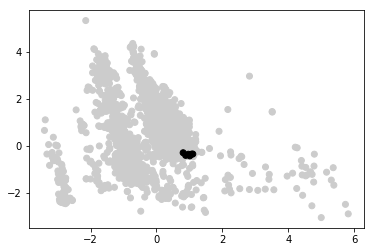

In [7]:
from functools import reduce
# detections_bad = reduce(lambda x, y: x+y, detections_bad)
# detections_good = reduce(lambda x, y: x+y, detections_good)

# df_good = pd.concat((pd.DataFrame(data=[d[1] for d in detections_good], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_good], columns=['x', 'y', 'w', 'h'])), axis=1)
# df_bad = pd.concat((pd.DataFrame(data=[d[1] for d in detections_bad], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_bad], columns=['x', 'y', 'w', 'h'])), axis=1)

# df = pd.DataFrame(np.vstack((df_good.values, df_bad.values)), columns=df_good.columns)

arr_good = np.array([ [d[1]] + list(d[2]) for d in detections_good])
arr_bad = np.array([ [d[1]] + list(d[2]) for d in detections_bad])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(arr_good[:19])
X_std = scaler.transform(arr_good[:19])

arr_good = scaler.transform(arr_good)
arr_bad = scaler.transform(arr_bad)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
pca_matrix = sklearn_pca.fit(X_std)
Y_sklearn = pca_matrix.transform(np.vstack((arr_good, arr_bad)))

colors = np.hstack((np.repeat(0, arr_good.shape[0]), np.repeat(1, arr_bad.shape[0])))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=colors, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

array([0.35015607, 1.25505142])

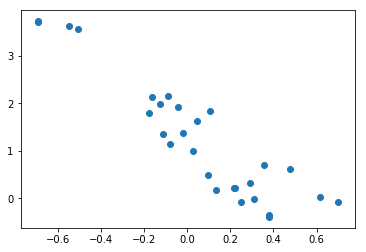

In [14]:
Y_sklearn = pca_matrix.transform(arr_good[20:48])
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1])
StandardScaler().fit(Y_sklearn).scale_

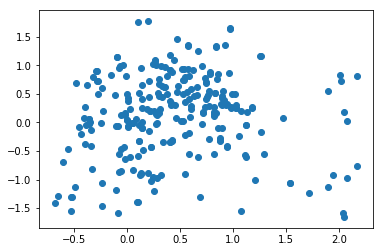

In [138]:
Y_sklearn = pca_matrix.transform(arr_bad)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1])

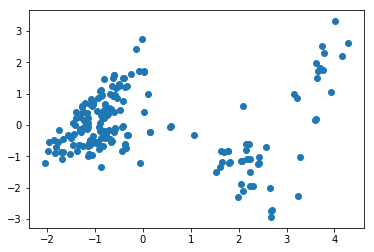

In [129]:
from functools import reduce
first_100s = reduce(lambda x, y: x+y, detections_good[:305])
arr_first_100s = np.array([ [d[1]] + list(d[2]) for d in first_100s])

from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(arr_first_100s)
X_std = std.transform(arr_first_100s)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2).fit(X_std)
Y_sklearn = sklearn_pca.transform(X_std)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1])

scale = StandardScaler().fit(Y_sklearn).scale_

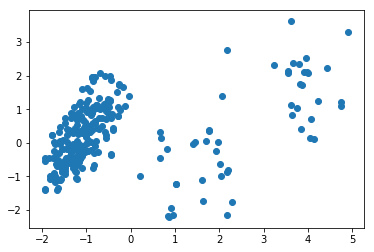

In [130]:
remaining = reduce(lambda x, y: x+y, detections_good[305:])
remaining = np.array([ [d[1]] + list(d[2]) for d in remaining])
new_y = sklearn_pca.transform(std.transform(remaining))
plt.scatter(new_y[:,0], new_y[:,1])

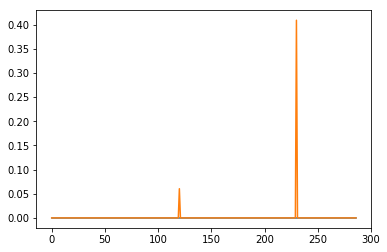

In [131]:
plt.plot(((np.absolute(new_y) - 3*scale) * ((np.absolute(new_y) - 3*scale) > 0)))

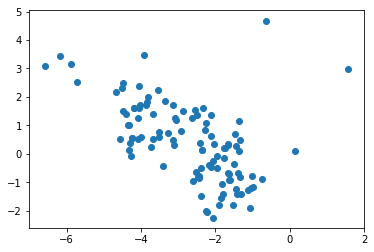

In [82]:
remaining = reduce(lambda x, y: x+y, detections_bad[:100])
remaining = np.array([ [d[1]] + list(d[2]) for d in remaining])
new_y = sklearn_pca.transform(std.transform(remaining))
plt.scatter(new_y[:,0], new_y[:,1])

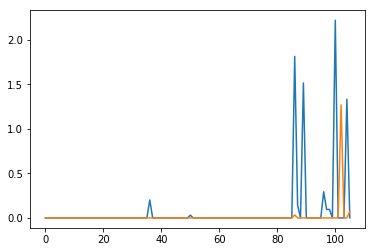

In [83]:
plt.plot(((np.absolute(new_y) - 3*scale) * ((np.absolute(new_y) - 3*scale) > 0)))

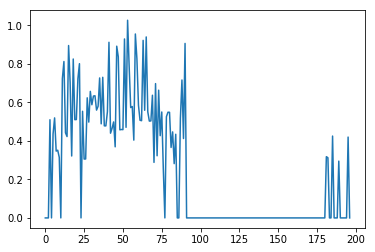

In [81]:
plt.plot(np.array(list(map(accu_detection, detections_bad))))